In [1]:
using LatticePhysics
using LatPhysPlottingPyPlot
using PyPlot; pygui(true);

In [3]:
function dump_graph_as_XML(
        lt :: L,
        fn :: AbstractString
    ) where {LS,LB,N, S<:AbstractSite{LS,3}, B<:AbstractBond{LB,N}, UC, L <: AbstractLattice{S,B,UC}}
    
    # create a list of filtered bonds
    bonds_filtered = [b for b in bonds(lt) if from(b)<to(b) && isPeriodic(b)==false]
    
    # open the file
    f = open(fn, "w")
    
    # start with a header
    println(f, "<LATTICEGRAPH sites=\"$(length(sites(lt)))\" bonds=\"$(length(bonds_filtered))\" >")
    
    # SITES
    for s in 1:length(sites(lt))
        print(f, "\t<SITE index=\"$(s)\" ")
        print(f, "label=\"$(label(sites(lt)[s])[1])\" ")
        print(f, "X=\"$(point(sites(lt)[s])[1])\" ")
        print(f, "Y=\"$(point(sites(lt)[s])[2])\" ")
        print(f, "Z=\"$(point(sites(lt)[s])[3])\" ")
        println(f, ">")
    end
    
    # BONDS
    for b in 1:length(bonds_filtered)
        print(f, "\t<BOND index=\"$(b)\" ")
        print(f, "label=\"$(label(bonds_filtered[b]))\" ")
        print(f, "from=\"$(from(bonds_filtered[b]))\" ")
        print(f, "to=\"$(to(bonds_filtered[b]))\" ")
        println(f, ">")
    end
    
    # end the file
    print(f, "</LATTICEGRAPH>")
    # close the file again
    close(f)
end

dump_graph_as_XML (generic function with 1 method)

In [11]:
uc = getUnitcell_8_3_b(4)
lt = getLatticeByBondDistance(uc, 10)
label!.(sites(lt), 1)
dump_graph_as_XML(lt, "8_3_b_big.xml")
lt

Lattice object
--> type Lattice{Site{Int64,3},Bond{Int64,0},Unitcell{Site{Int64,3},Bond{Int64,3}}}
--> 496 sites of type Site{Int64,3}
--> 1278 bonds of type Bond{Int64,0}
--> unitcell of type Unitcell{Site{Int64,3},Bond{Int64,3}}

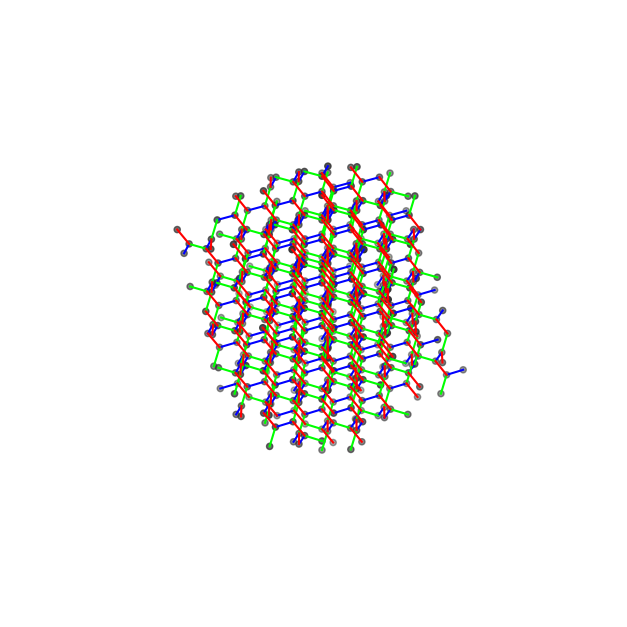

In [12]:
plotLattice(lt, colorcode_bonds=:Kitaev)